# <center>Logistic Regression Model To Detect Heart Disease</center>



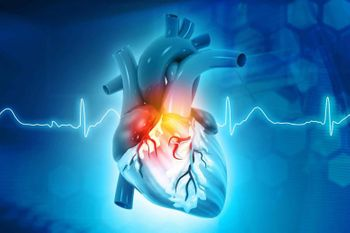

### Premise:

India accounts for one-fifth of the total deaths occurring from stroke and ischemic heart disease, especially in younger adults according to the World Health Organization. “Cardiovascular diseases affect Indians a decade earlier than their western counterparts and nearly 3 million people die of stroke and heart attack every year. The most unfortunate part is that 40 per cent of those who suffer a heart attack are below the age of 55,” said Dr Harinder K. Bali, Chairman, Cardiac Sciences, Paras Hospitals, Panchkula.

“With the incidences of heart disease deaths rising in India by 34 per cent over the last 26 years, it is time to be aware of this serious issue and take necessary steps to reduce the burden of cardiovascular disease in the country,” he continued.


Being informed about the risk factors can help people to manage their symptoms early and avoid the chances of a sudden heart attack. (https://indianexpress.com/article/lifestyle/health/world-heart-day-2021-risk-factors-symptoms-treatment-young-adults-7537442/)


### GOAL: 

**Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. **The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence).** In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* **target:**
     - **0 for no presence of heart disease,** 
     - **1 for presence of heart disease**

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Imports**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

----

**Reading the data.**

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Dictionary

|	Attribute	|	Description
|	--------------	|	--------------
|	age	|	age
|	sex	|	sex
|	cp	|	chest pain type (4 values)
|	trestbps	|	resting blood pressure
|	chol	|	serum cholestoral in mg/dl
|	fbs	|	fasting blood sugar > 120 mg/dl
|	restecg	|	resting electrocardiographic results (values 0,1,2)
|	thalach	|	maximum heart rate achieved
|	exang	|	exercise induced angina
|	oldpeak	|	oldpeak = ST depression induced by exercise relative to rest
|	slope	|	the slope of the peak exercise ST segment
|	ca	|	number of major vessels (0-3) colored by flourosopy
|	thal	|	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
|	target	|	target:0 for no presence of heart disease, 1 for presence of heart disease



In [5]:
df['target'].unique()

array([1, 0], dtype=int64)

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Exploratory Data Analysis and Visualization



In [7]:
print("******* Data Information *******")
df.info()


******* Data Information *******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
print("******* Data Types *******")
df.dtypes

******* Data Types *******


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
print("******* Data Summary *******")
df.describe().transpose()


******* Data Summary *******


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
print("******* Null Values *******")
df.isnull().sum()

******* Null Values *******


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Visualizations

**Creating a count plot that shows the total counts per target value.**

Text(0.5, 1.0, 'Countplot for Target Feature')

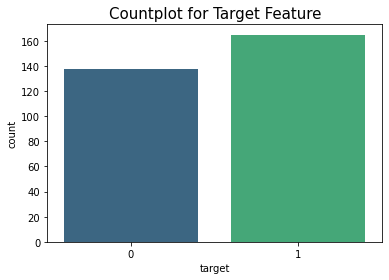

In [11]:
ax = sns.countplot(df["target"], palette='viridis')
ax.set_title('Countplot for Target Feature', fontsize=15)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Visualising the relationships between the features**

In [ ]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.pairplot(df, hue='target')

**Creating a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']


In [ ]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue="target", palette = 'viridis')


**Creating boxplot for following Variables**

["age", "trestbps", "chol","restecg", "thalach", "oldpeak"]

In [ ]:
vars = df[["age", "trestbps", "chol","restecg", "thalach", "oldpeak"]]
plt.figure(figsize=(40,20))
sns.set(font_scale=2)
for i in range(len(vars.columns)):
    plt.subplot(2,3, i + 1)
    
    ax=sns.boxplot(y=vars.columns[i], x='target', data=df,palette = 'viridis')
    ax.set_title('Target v/s '+str(vars.columns[i]), fontsize=30)
    
plt.show()

**Creating heatmap that displays the correlation between all the columns.**

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')


# Machine Learning

**Separating the features from the labels into 2 objects, X and y.**

In [ ]:
df.head()

In [ ]:
X=df.drop('target',axis=1)

In [ ]:
y=df['target']

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Creating a StandardScaler object and normalizing the X train and test set feature data. We only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [ ]:
scaler =StandardScaler()

In [ ]:
X_train[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']]=scaler.fit_transform(X_train[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']])

In [ ]:
X_test[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']] = scaler.transform(X_test[['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']])

In [ ]:
X_train.head(3)

In [ ]:
col =X_train.columns
col

### Defining functions for Checking Probability and VIF (Here we do not use RFE, since the no. of input features is low).

In [ ]:
import statsmodels.api as sm

In [ ]:
def sm_model(X,y):
    X_train_sm = sm.add_constant(X)
    logm = sm.GLM(y, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    
    return res.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def vif_check(X,y):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Trial No. : 1

In [ ]:
sm_model(X_train,y_train)

In [ ]:
vif_check(X_train,y_train)

**'fbs' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 2

In [ ]:
col = col.drop('fbs',1)

In [ ]:
sm_model(X_train[col],y_train)


In [ ]:
vif_check(X_train[col],y_train)

**'age' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 3

In [ ]:
col = col.drop('age',1)

In [ ]:
sm_model(X_train[col],y_train)

In [ ]:
vif_check(X_train[col],y_train)

**'restecg' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 4

In [ ]:
col = col.drop('restecg',1)

In [ ]:
sm_model(X_train[col],y_train)

In [ ]:
vif_check(X_train[col],y_train)

**'chol' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 5

In [ ]:
col = col.drop('chol',1)

In [ ]:
sm_model(X_train[col],y_train)

In [ ]:
vif_check(X_train[col],y_train)

**'trestbps' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 6

In [ ]:
col = col.drop('trestbps',1)

In [ ]:
sm_model(X_train[col],y_train)

In [ ]:
vif_check(X_train[col],y_train)

**'slope' has a high p-value. Hence, it is to be dropped in next trial.**

### Trial No. : 7

In [ ]:
col = col.drop('slope',1)

In [ ]:
sm_model(X_train[col],y_train)

In [ ]:
vif_check(X_train[col],y_train)

**Now all the p-values and VIF are acceptable**

**Checking the correlation between the final features**

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[col].corr(), cmap="viridis", annot=True)

**As seen in the heatmap, the features are not very correlated and hence we will proceed further with the analysis with this features only.**

### Preparing Final training model

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model.fit()
res.summary()

**Predicting on X_train**

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
#Creating a consolidated y_train_pred_final 
y_train_pred_final = pd.DataFrame({'Target':y_train.values, 'Target_Prob':y_train_pred})
y_train_pred_final.head()

In [ ]:
#Here we are taking a arbitrary cut-off of 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Target_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

### Model Evaluation

In [ ]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [ ]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.Predicted )
confusion

In [ ]:
# Predicted     Negative  Positive
# Actual
# Negative        96       27
# Positive        15      134

**Accuracy:**

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.Predicted)


In [ ]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

**Sensitivity:**

In [ ]:
TP/(TP+FN)

**Specificity**

In [ ]:
# Calculating the 
TN/(TN+FP)

### Optimising Cut off (ROC Curve)

In [ ]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for the Model')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Calling the ROC function
draw_roc(y_train_pred_final.Target, y_train_pred_final.Target_Prob)

In [ ]:
# Creating columns to check the Predicted Values with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Target_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

In [ ]:
# Plotting the accuracy, sensitivity and specificity
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(8,8))
plt.show()

**From the above curve we can consider 0.6 as the cut-off point**

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Target_Prob.map( lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

**Accuracy:**

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

**Sensitivity:**

In [ ]:
# Calculating the sensitivity
TP/(TP+FN)

**Specificity:**

In [ ]:
# Calculating the specificity
TN/(TN+FP)

## Prediction on Test set

In [ ]:
X_test=X_test[col]

In [ ]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [ ]:
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Target_Prob'})
y_pred_final.head()

In [ ]:
# Making prediction using cut off 0.60
y_pred_final['final_predicted'] = y_pred_final.Target_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_pred_final

**Accuracy:**

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['target'], y_pred_final.final_predicted)

**Creating Confusion Matrix:**

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['target'], y_pred_final.final_predicted )
confusion2

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

**Sensitivity:**

In [ ]:
# Calculating the sensitivity
TP/(TP+FN)

**Specificity:**

In [ ]:
# Calculating the specificity
TN/(TN+FP)

### Precision-Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.Predicted )
confusion

**Precision**

In [ ]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

**Recall**

In [ ]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

**Precision and recall tradeoff**

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Target, y_train_pred_final.Target_Prob)

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g--")
plt.show()

**From Precision-Recall Tradeoff we get similar values for the Cut-off. To re-validate we will do the necessary checks again.**

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Target_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

In [ ]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

In [ ]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

### Prediction on Test set

In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Target_Prob','target':'Target'})
y_pred_final.head()

In [ ]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Target_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Target'], y_pred_final.final_predicted)

In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Target'], y_pred_final.final_predicted )
confusion2

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

**Precision**

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

**Recall**

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

### Conclusion

**The major attributes impacting the diagnosis of a heart disease are:**
   - exercise induced angina
   - sex of the patient
   - chest pain type (4 values)
   - oldpeak = ST depression induced by exercise relative to rest
   - number of major vessels (0-3) colored by flourosopy
   - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected. **The model designed has a recall of 87.5% which implies that it can identify 87.5% of the positive cases correctly.**

* Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives). **The model has a precision of 82.35% which means out of 100 positive cases it recognises, 82 will actually be positive.**

## <center> Thank You!</center> 